Importing all Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Loading the CSV file

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
#separating the target variable
X = df.drop('target', axis=1)
y = df['target']

Making 80:20 Train Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy of the KNN algorithm(Clustering)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
    
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

print("Accuracy: ",score.mean())

Accuracy:  0.7276413478012564


Accuracy of the XGBoost algorithm (classification)

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.98537


Accuracy of the Random Forest algorithm (classification)

In [8]:
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)

score.mean()

0.9921568627450981

In [9]:
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Creating a feature importance chart to determine the impact of different factors on Heart Health

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

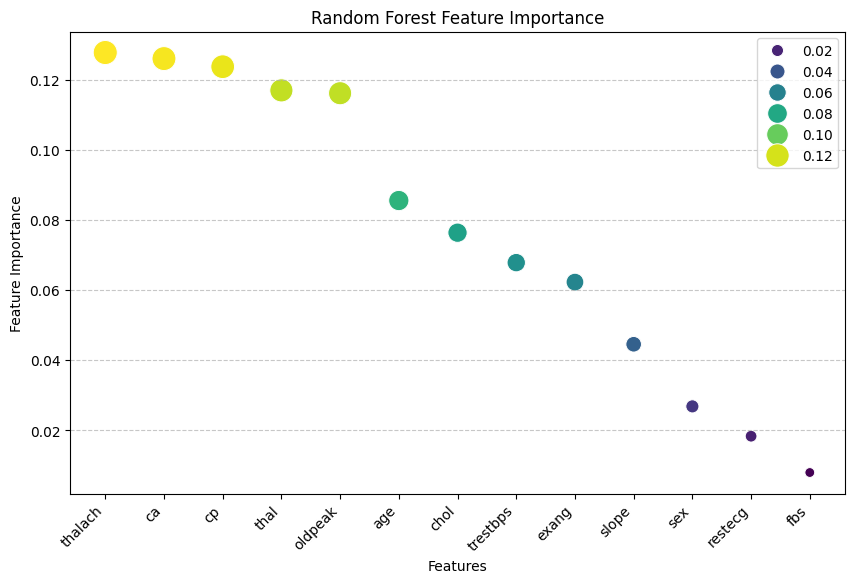

In [24]:

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

feature_importances = feature_importances.sort_values(ascending=False)

cmap = sns.color_palette("viridis", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_importances.index, y=feature_importances.values,
                size=feature_importances.values, sizes=(50, 300),
                hue=feature_importances.values, palette=cmap)

plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()